# MODELING & EVALUATION
- Goal: develop a **regression model** that performs better than a **baseline**.

- You must **evaluate a baseline model**, and show how the model you end up with performs better than that.

- `model.py`: will have the functions to fit, predict and evaluate the model

- Your notebook will contain **various algorithms** and/or hyperparameters tried, along with the evaluation code and results, before settling on the final algorithm.

- Be sure and evaluate your model using the **standard techniques**: plotting the residuals, computing the evaluation metric (SSE, RMSE, and/or MSE), comparing to baseline, plotting y by y_hat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from split_scale import split_scale
from feature_selection import rfe, k_best

import warnings
warnings.filterwarnings("ignore")

## 1. Evaluate SelectKBest Algorithm

### 1.1 split data and apply Algorithm

In [2]:
train, test, scaler = split_scale()


In [3]:
train, selector = k_best(train, 3)
train.head()

,home_size,bathroomcnt,tax_rate,home_value
14140,0.361642,0.0,0.066475,0.421163
12285,0.225008,0.0,0.397378,0.302009
13357,0.347853,0.5,0.197533,0.324614
14130,0.282357,0.5,0.089810,0.228193
1187,0.524914,1.0,0.668349,0.248124


In [4]:
X = train.drop(columns = 'home_value')
y = train[['home_value']]

### 1.2 Build Linear Model

In [5]:
lm1 = LinearRegression()
lm1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 1.3 Evaluate Model

In [6]:
predictions = pd.DataFrame({'actual': train.home_value})
predictions['predicted'] = lm1.predict(X)

In [7]:
predictions.head()

,actual,predicted
14140,0.421163,0.454006
12285,0.302009,0.223011
13357,0.324614,0.392839
14130,0.228193,0.428937
1187,0.248124,0.212227


In [8]:
RMSE_lm1 = np.sqrt(mean_squared_error(predictions.actual, predictions.predicted))
RMSE_lm1

0.17437232291729288

In [9]:
Kbest_r2 = lm1.score(X, y)
Kbest_r2

0.3826292186799015

### 1.4 Visualization

Text(0.5, 1.0, 'Actual vs predicted')

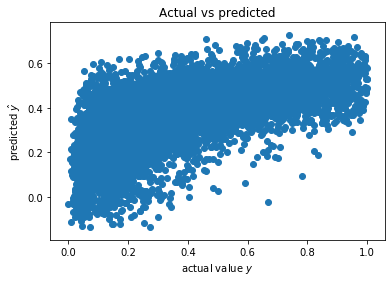

In [10]:
plt.scatter(predictions.actual, predictions.predicted)
plt.ylabel('predicted $\hat{y}$')
plt.xlabel('actual value $y$')
plt.title('Actual vs predicted')

Text(0.5, 1.0, 'Actual vs Residual')

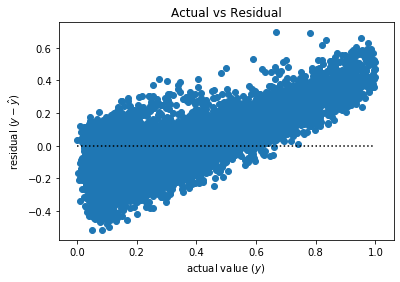

In [11]:
residuals = predictions.actual - predictions.predicted
plt.hlines(0, predictions.actual.min(), predictions.actual.max(), ls=':')
plt.scatter(predictions.actual, residuals)
plt.ylabel('residual ($y - \hat{y}$)')
plt.xlabel('actual value ($y$)')
plt.title('Actual vs Residual')

### 1.5 Eveluate on Test

In [12]:
X_test = test.drop(columns = 'home_value')
y_test = test[['home_value']]

In [13]:
X_test_rfe = selector.transform(X_test)


In [14]:
y_test_predictions = lm1.predict(X_test_rfe)
RMSE_lm1_t = np.sqrt(mean_squared_error(y_test, y_test_predictions))


## 2. Evaluate RFE Algorithm

### 2.1 Split data and apply algorithm

In [15]:
train, test, scaler= split_scale()
train, selector = rfe(train, 3)
train.head()

,home_size,tax_rate,yearbuilt,home_value
14140,0.361642,0.066475,0.496296,0.421163
12285,0.225008,0.397378,0.496296,0.302009
13357,0.347853,0.197533,0.503704,0.324614
14130,0.282357,0.089810,0.518519,0.228193
1187,0.524914,0.668349,0.814815,0.248124


In [16]:
X = train.drop(columns = 'home_value')
y = train[['home_value']]

### 2.2 Build Linear Model

In [17]:
lm2 = LinearRegression()
lm2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 2.3 Evaluate Model

In [18]:
predictions = pd.DataFrame({'actual': train.home_value})
predictions['predicted'] = lm2.predict(X)
predictions.head()

,actual,predicted
14140,0.421163,0.463794
12285,0.302009,0.230321
13357,0.324614,0.386564
14130,0.228193,0.425017
1187,0.248124,0.222550


In [19]:
RMSE_lm2 = np.sqrt(mean_squared_error(predictions.actual, predictions.predicted))
RMSE_lm2

0.17385616127242856

In [20]:
rfe_r2 = lm2.score(X, y)
rfe_r2

0.3862787827088511

### 2.4 visualization

Text(0.5, 1.0, 'Actual vs predicted')

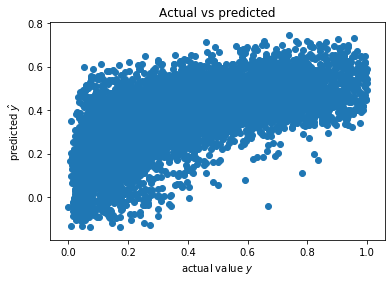

In [21]:
plt.scatter(predictions.actual, predictions.predicted)
plt.ylabel('predicted $\hat{y}$')
plt.xlabel('actual value $y$')
plt.title('Actual vs predicted')

Text(0.5, 1.0, 'Actual vs Residual')

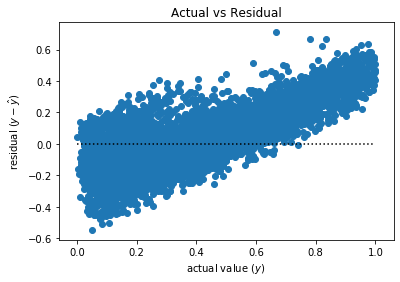

In [22]:
residuals = predictions.actual - predictions.predicted
plt.hlines(0, predictions.actual.min(), predictions.actual.max(), ls=':')
plt.scatter(predictions.actual, residuals)
plt.ylabel('residual ($y - \hat{y}$)')
plt.xlabel('actual value ($y$)')
plt.title('Actual vs Residual')

### 2.5 apply the model to test set and evaluate its performance


In [23]:
X_test = test.drop(columns = 'home_value')
y_test = test[['home_value']]

In [24]:
X_test_rfe = selector.transform(X_test)
y_test_predictions = lm2.predict(X_test_rfe)
RMSE_lm2_t = np.sqrt(mean_squared_error(y_test, y_test_predictions))

## 3. Baseline model

In [25]:
predictions = pd.DataFrame({'actual': train.home_value})
predictions['baseline']=train.home_value.mean()
predictions.head()

,actual,baseline
14140,0.421163,0.35538
12285,0.302009,0.35538
13357,0.324614,0.35538
14130,0.228193,0.35538
1187,0.248124,0.35538


In [26]:
RMSE_bl = np.sqrt(mean_squared_error(predictions.actual, predictions.baseline))
RMSE_bl

0.22192412556326835

In [30]:
predictions = pd.DataFrame({'actual':test.home_value})
predictions['baseline']=train.home_value.mean()
RMSE_bl_t = np.sqrt(mean_squared_error(predictions.actual, predictions.baseline))
RMSE_bl_t

0.21454587704066816

## Summary


In [27]:
pd.DataFrame({'$r^2$': [Kbest_r2, rfe_r2, np.nan], 
              'RMSE_Train': [RMSE_lm1, RMSE_lm2,RMSE_bl],
             'RMSE_Test': [RMSE_lm1_t , RMSE_lm2_t,np.nan]}, 
             index = ['Kbest', 'RFE', 'BaseLine'])

,$r^2$,RMSE_Train,RMSE_Test
Kbest,0.382629,0.174372,0.171664
RFE,0.386279,0.173856,0.170920
BaseLine,NaN,0.221924,NaN


- From above data, it looks like RFE algorithm is doing the best among those three.

In [28]:
lm2.coef_

array([[ 0.35688044, -0.55820597,  0.11445494]])

In [29]:
lm2.intercept_

array([0.31503464])